In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy

# Synthetic Data Generation

In [2]:
T = np.linspace(-1,1,2**7)

def b_true(t):
    return math.e**t

# covariate generation
K = np.zeros((2**7,2**7))
for i in range(2**7):
    for j in range(2**7):
        K[i,j]=math.e**(-2*(T[i]-T[j])**2)
        
x = np.random.multivariate_normal(np.zeros(2**7),K,100) 

y = 2*np.dot(x[:,2**6],b_true(0))

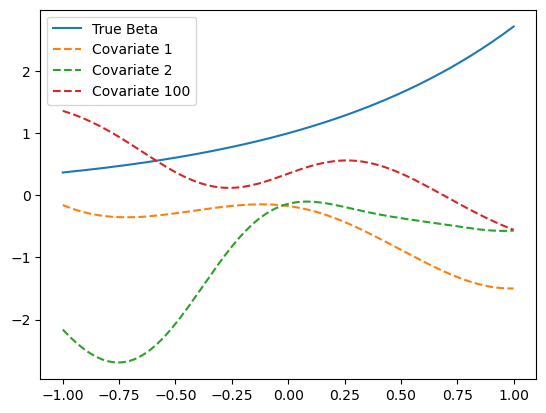

In [3]:
plt.figure()
plt.plot(T,b_true(T),label='True Beta')
plt.plot(T,x[0,:],label='Covariate 1',linestyle='dashed')
plt.plot(T,x[1,:],label='Covariate 2',linestyle='dashed')
plt.plot(T,x[99,:],label='Covariate 100',linestyle='dashed')
plt.legend()
plt.show()

In [4]:
y

array([-0.35094728, -0.2584004 ,  3.74902396,  1.32137332,  0.74023405,
        1.77157296, -1.58108544, -0.87106461,  0.73676065,  1.32890448,
       -0.49945562,  1.55690163,  0.81911138,  3.33416882, -3.94480387,
        1.77226346,  0.40779066, -2.01470573,  0.66191699,  1.91590991,
       -1.1839357 ,  2.29745963,  0.81150821, -0.08893097, -0.10686159,
       -0.32108396,  1.04757057, -2.20445869, -1.09406972, -3.34559425,
        2.24345353, -4.26505248, -1.43087802, -0.69601999,  2.53426476,
        2.23929799, -0.05726138,  0.1587673 ,  0.15411191, -0.94459989,
       -0.76250019, -2.45330276, -2.2386339 ,  0.61518507,  0.01357817,
       -2.9163091 ,  0.2809972 , -0.2222543 ,  2.73138288,  1.38348701,
        1.83133927, -2.11431342, -1.63131778,  0.09457383, -0.80853448,
       -1.5425958 , -0.25515174, -1.62356334,  0.67083083,  3.61422693,
        1.27507158,  1.32298488,  1.51455827,  0.88001094,  0.60184119,
        0.20941383, -1.65420076,  3.09256591,  2.0633424 ,  3.89

# Posterior of Beta

In [5]:
R = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        R[i,j]=4*K[2**6,2**6]*x[i,2**6]*x[j,2**6]
        
L = np.zeros((100,128))
for i in range(100):
    L[i,:]=2*K[:,2**6]*x[i,2**6]

# Posterior Parameter:
m = np.dot(np.transpose(L),np.linalg.inv(R+10*np.identity(100)))
m = np.dot(m,y)

cov = K - np.dot(np.dot(np.transpose(L),np.linalg.inv(R+10*np.identity(100))),L)

Text(0.5, 1.0, 'A simulation from the posterior')

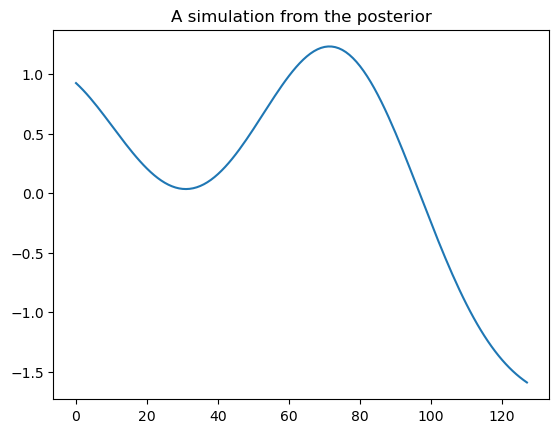

In [6]:
sim = np.random.multivariate_normal(m,cov)
plt.plot(sim)
plt.title('A simulation from the posterior')

In [7]:
fitted = []
for i in range(100):
    fitted.append(2*np.dot(x[i,2**6],m[2**6]))

Text(0, 0.5, 'Fitted Values')

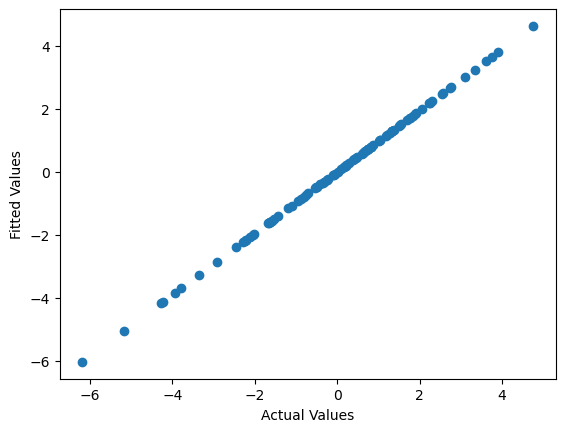

In [8]:
plt.scatter(y,fitted)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')